<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%97%D0%BD%D0%B0%D0%BA%D0%BE%D0%BC%D1%81%D1%82%D0%B2%D0%BE_%D1%81_%D1%84%D1%80%D0%B5%D0%B9%D0%BC%D0%B2%D0%BE%D1%80%D0%BA%D0%BE%D0%BC_PyTorch__old.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ООО "Университет Цифровых Технологий платформа 3"

# Знакомство с фреймворком PyTorch.

##Загрузка библиотек

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from time import time

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader # для обработки данных
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor, Lambda
from torchvision.io import read_image # работа с изображениями
from torch import nn, optim # работа с нейронной сетью
import torch.onnx as onnx # экспорт модели
import torchvision.models as models # сохранение модели

## Тензоры

Тензоры - структуры данных, очень близкие к массивам и матрицам. В PyTorch тензоры используются для представления входных и выходных данных моделей, и как параметры моделей. 

Тензоры подобны массивам ndarray библиотеки NumPy, но отличаются тем, что могут выполняться на GPU.
Тензоры PyTorch и массивы NumPy зачастую могут использовать одну и ту же память, без необходимости копирования данных.

Но главное отличие - тензоры поддерживают автоматическое дифференцирование!

### Инициализация тензоров

Непосредственно из данных:

In [ ]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

Из массива NumPy:

In [ ]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

Из другого тензора:

In [ ]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.7860, 0.6254],
        [0.5603, 0.1552]]) 



Из случайных данных или констант:

In [ ]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.7638, 0.3662, 0.3199],
        [0.0108, 0.5728, 0.2876]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Аттрибуты (свойства) тензора

In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Операции с тензорами

Существует более 100 операций, включая арифметические, линейную алгебру, манипуляции с матрицами (транспонирование, индексацию, слайсинг), сэмплирование.

Все эти операции могут выполняться на GPU (обычно заметно быстрее, чем на CPU)

По умолчанию, тензоры создаются на CPU. Для переноса тензора на GPU есть метод .to

Следует помнить, что копирование больших тензоров с устройства на устройство может быть затратно по памяти и времени. 


In [ ]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
tensor.device

device(type='cuda', index=0)

Индексация и слайсинг такие же, как в NumPy.

In [ ]:
tensor = torch.ones(4, 4)
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


Объединение тензоров:

Для конкатенации тензоров вдоль заданной оси используем torch.cat:

In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=0)
print(t1)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


Арифметические операции

In [ ]:
# Матричное умножение. y1, y2, y3 будут иметь одинаковые значения
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

In [ ]:
# Поэлементное умножение. z1, z2, z3 будут иметь одинаковые значения
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

Одноэлементные тензоры.

Если есть одноэлементный тензор, полученный, например, путем агрегирования всех значений тензора в одно значение, то получить его питоновское значение (не тензор, а просто число) можно методом .item()

In [ ]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

12.0 <class 'float'>


Операции in-place ("на месте") Операции, сохраняющие результат в операнде, называются "in place". Они обозначаются суффиксом \_. Например: x.copy\_(y), x.t_(), изменит x.

In [ ]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


### Bridge with NumPy

Тензоры на CPU и массивы NumPy могут иметь общую память, и один будет меняться с изменением другого.

Tensor to NumPy array

In [ ]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


Изменение тензора изменит массив numpy: 

In [ ]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


NumPy array to Tensor

In [ ]:
n = np.ones(5)
t = torch.from_numpy(n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
n: [1. 1. 1. 1. 1.]


Изменение массива изменит и тензор:

In [ ]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## Datasets and Dataloaders

**Наборы данных и загрузчики данных.**

Желательно отделять данные от кода для обучения модели. У PyTorch есть 2 примитива для этого:
`torch.utils.data.DataLoader` и `torch.utils.data.Dataset`
Наборы данных содержит образцы с соответствующими метками, а загрузчики данных оборачивают эти данные в *итерабельный* (`Iterable`) объект для удобства работы с данными.

PyTorch имеет ряд встроенных датасетов (например FashionMNIST) 
Есть также готовые наборы данных: Image Datasets, Text Datasets, and Audio Datasets



### Загрузка датасета

Ниже пример того, как загрузить набор данных Fashion-MNIST из TorchVision. 

Fashion-MNIST - это набор изображений, состоящий из 60 000 обучающих примеров и 10 000 тестовых примеров. Каждый пример содержит изображение в оттенках серого 28 × 28 и соответствующую метку из одного из 10 классов. 

Мы загружаем набор данных FashionMNIST со следующими параметрами: 
* root - это путь, по которому хранятся данные для тренировки / теста, 
* train указывает обучающий или тестовый набор данных, 
* download = True загружает данные из Интернета, если они недоступны в корневом каталоге. 
* transform и target_transform определяют преобразования функции и метки

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### Визуализация

Можно индексировать наборы данных вручную как список: `training_data[index]`. Мы используем matplotlib для визуализации некоторых образцов в наших обучающих данных.

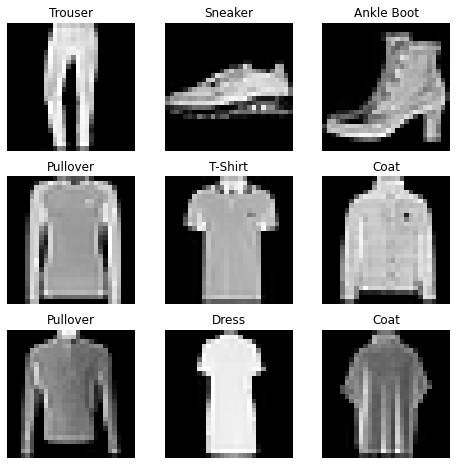

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Создание пользовательского набора данных из ваших файлов 
Пользовательский класс набора данных должен реализовывать три функции: `__init__`, `__len__` и `__getitem__`. Изображения FashionMNIST хранятся в каталоге `img_dir`, а их метки хранятся отдельно в CSV-файле `annotations_file`. 

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        sample = {"image": image, "label": label}
        return sample

`__init__` 

Функция `__init__` запускается один раз при создании экземпляра объекта Dataset. Мы инициализируем каталог, содержащий изображения, файл аннотаций и оба преобразования (более подробно описано в следующем разделе). Файл `label.csv` выглядит так:

```
tshirt1.jpg, 0
tshirt2.jpg, 0
......
ankleboot999.jpg, 9
```



`__len__` 

Функция `__len__` возвращает количество выборок в нашем наборе данных. Пример:
```
    def __len__(self):
        return len(self.img_labels)
```



`__getitem__` 

Функция `__getitem__` загружает и возвращает образец из набора данных по заданному индексу `idx`. На основе индекса он определяет местоположение изображения на диске, преобразует его в тензор с помощью `read_image`, извлекает соответствующую метку из данных csv в `self.img_labels`, вызывает для них функции преобразования (если применимо) и возвращает тензорное изображение и соответствующую метку в словаре Python.
```
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        sample = {"image": image, "label": label}
        return sample
```



### Подготовка данных к обучению с помощью DataLoaders 
DataLoaders извлекает характеристики нашего набора данных и маркирует по одному образцу за раз. При обучении модели мы обычно хотим передавать образцы в «мини-пакетах», перетасовывать данные в каждую эпоху, чтобы уменьшить переобучение модели, и использовать многопроцессорность Python для ускорения извлечения данных. DataLoader - это итерабельный объект (Iterable) с простым API.

In [ ]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

### Итерирование (перебор) данных через DataLoader 
Мы загрузили этот набор данных в Dataloader и можем перебирать набор данных по мере необходимости. Каждая итерация ниже возвращает пакет `train_features` и `train_labels` (содержащий batch_size = 64 фичи и метки). 
Поскольку мы указали `shuffle = True`, после итерации по всем пакетам данные перетасовываются.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


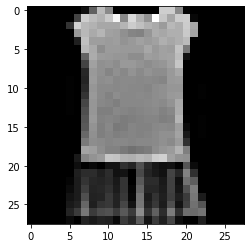

Label: 3


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

### Документация
[torch.utils.data API](https://pytorch.org/docs/stable/data.html)

## Transforms
Данные не всегда поступают в окончательной обработанной форме, которая требуется для обучения алгоритмов машинного обучения. Мы используем преобразования (`transforms`), чтобы выполнять некоторые манипуляции с данными и делать их пригодными для обучения. Все наборы данных `TorchVision` имеют два параметра - `transform` для изменения образца и `target_transform` для изменения меток, которые принимают вызываемые объекты, содержащие логику преобразования. Модуль `torchvision.transforms` предлагает несколько часто используемых преобразований из коробки. Изображения `FashionMNIST` представлены в формате PIL, а метки - целые числа. Для обучения нам нужны изображения в виде нормализованных тензоров и метки в виде тензоров с OHE кодированием. Чтобы сделать эти преобразования, мы используем трансформации `ToTensor` и `Lambda`.

In [ ]:
ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

`ToTensor()` 

`ToTensor` преобразует изображение PIL или NumPy ndarray в FloatTensor и масштабирует значения интенсивности пикселей изображения в диапазоне [0., 1.] 

Лямбда-преобразования Лямбда-преобразования применяют любую определяемую пользователем лямбда-функцию. Здесь мы определяем функцию, которая превращает целое число в тензор с OHE кодированием. Сначала он создает нулевой тензор размера 10 (количество меток в нашем наборе данных) и вызывает `scatter_`, который присваивает значение = 1 индексу, заданному меткой `y`.
```
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))
```



### Документация

[torchvision.transforms API](https://pytorch.org/vision/stable/transforms.html)

## Создание нейронной сети

Нейронные сети состоят из слоев / модулей, которые выполняют операции с данными. Пространство имен `torch.nn` предоставляет все строительные блоки, необходимые для создания собственной нейронной сети. Каждый модуль в PyTorch является подклассом `nn.Module`. Нейронная сеть - это сам модуль, состоящий из других модулей (слоев). Эта вложенная структура позволяет легко создавать сложные архитектуры и управлять ими. В следующих разделах мы построим нейронную сеть для классификации изображений в наборе данных FashionMNIST.

### Получение устройства (device)

Мы хотим иметь возможность обучать нашу модель на GPU, если он доступен. Проверим, доступен ли `torch.cuda`, иначе продолжим использовать CPU.


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


### Создание класса сети
Мы определяем нашу нейронную сеть, создав подкласс `nn.Module`, и инициализируем уровни нейронной сети в `__init__`. Каждый подкласс `nn.Module` реализует операции с входными данными в методе `forward`.

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

Создадим экземпляр нашего класса и поместим его на GPU

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


Чтобы использовать модель, передаем ей входные данные. При этом выполняется метод `forward` модели вместе с некоторыми фоновыми операциями. Не вызывайте `model.forward()` напрямую! Вызов модели на входе возвращает 10-мерный тензор с необработанными предсказанными значениями для каждого класса. Мы получаем вероятности предсказания, передав их через экземпляр модуля `nn.Softmax`.

In [ ]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([8], device='cuda:0')


### Слои модели

Давайте разберем слои в модели FashionMNIST. Возьмем образец мини-батча из 3-х изображений размером 28x28 и посмотрим, что с ним происходит, когда мы передаем его сети.

In [ ]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


**nn.Flatten** 

Мы инициализируем слой [`nn.Flatten`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html) для преобразования каждого 2D-изображения 28x28 в непрерывный массив из 784 значений пикселей (размер мини-батча (при dim = 0) сохраняется).

In [ ]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


**nn.Linear** 

[Линейный слой](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) - это модуль, который применяет линейное преобразование ко входу, используя сохраненные веса и смещения.

In [ ]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


**nn.ReLU** 

Нелинейные активации создают сложные сопоставления между входами и выходами модели. Они применяются после линейных преобразований для введения нелинейности. В этой модели мы используем [`nn.ReLU`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) между линейными слоями, но есть и другие активации для внесения нелинейности в модель.

In [ ]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.4802, -0.0933,  0.0599, -0.1977,  0.1587, -0.0726,  0.0988,  0.1749,
          0.2344, -0.2523, -0.6768, -0.0181, -0.1876,  0.3562, -0.3777,  0.2276,
          0.1084, -0.1410,  0.1514, -0.0398],
        [ 0.1804,  0.1590,  0.1900, -0.6417, -0.1827,  0.2464,  0.3264, -0.1378,
          0.1095, -0.0487, -0.5425, -0.0481, -0.1596,  0.1938, -0.2210,  0.2705,
         -0.2390, -0.2151,  0.1359,  0.1986],
        [ 0.2287, -0.0362,  0.2164, -0.3620,  0.0633,  0.1443, -0.3372,  0.0418,
          0.0474, -0.2862, -0.5506,  0.0583, -0.5138,  0.3050, -0.0979, -0.1212,
          0.0043, -0.1275, -0.2912,  0.1626]], grad_fn=<AddmmBackward>)


After ReLU: tensor([[0.4802, 0.0000, 0.0599, 0.0000, 0.1587, 0.0000, 0.0988, 0.1749, 0.2344,
         0.0000, 0.0000, 0.0000, 0.0000, 0.3562, 0.0000, 0.2276, 0.1084, 0.0000,
         0.1514, 0.0000],
        [0.1804, 0.1590, 0.1900, 0.0000, 0.0000, 0.2464, 0.3264, 0.0000, 0.1095,
         0.0000, 0.0000, 0.0000, 0.0000, 0.1938, 0.000

**nn.Sequential** 

[`nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) - это упорядоченный контейнер модулей. Данные проходят через все модули в том же порядке. 

In [ ]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [ ]:
logits

tensor([[ 0.0132,  0.2044, -0.1366,  0.1272, -0.0691,  0.0154,  0.1689, -0.0386,
         -0.2548, -0.1110],
        [-0.0206,  0.1415, -0.0999,  0.0678, -0.1895,  0.0219,  0.0927,  0.0289,
         -0.2263,  0.0008],
        [ 0.0031,  0.2759, -0.1224,  0.1043, -0.0480,  0.0662,  0.1467,  0.0979,
         -0.2738, -0.0540]], grad_fn=<AddmmBackward>)

**nn.Softmax**

Последний линейный слой нейронной сети возвращает логиты - необработанные значения в [-infty, infty], которые передаются в модуль [`nn.Softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html). Логиты масштабируются до значений [0, 1], представляющих прогнозируемые вероятности модели для каждого класса. Параметр `dim` указывает размерность, по которой значения должны в сумме равняться 1.

### Параметры модели

Многие слои внутри нейронной сети параметризованы, то есть имеют связанные веса и смещения, которые оптимизируются во время обучения. Создание подкласса `nn.Module` автоматически отслеживает все поля, определенные внутри вашего объекта модели, и делает все параметры доступными с помощью методов вашей модели `parameters()` или `named_parameters()`. В этом примере мы перебираем каждый параметр и печатаем его размер и предварительный просмотр его значений.

In [ ]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0023,  0.0333, -0.0318,  ..., -0.0048, -0.0024, -0.0303],
        [ 0.0170, -0.0278,  0.0276,  ...,  0.0046,  0.0110,  0.0207]],
       device='cuda:0', grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0353, -0.0125], device='cuda:0', grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0320,  0.0274,  0.0436,  ...,  0.0022,  0.0439, -0.0213],
        [-0.0160, -0.0170,  0.0216,  ..., -0.0149,  0.0021, -0.0203]],
       device='cuda

### Документация

[torch.nn API](https://pytorch.org/docs/stable/nn.html)

## Автоматическое дифференцирование
При обучении нейронных сетей наиболее часто используется алгоритм обратного распространения. В этом алгоритме параметры (веса модели) настраиваются в соответствии с градиентом функции потерь по отношению к данному параметру. Для вычисления этих градиентов PyTorch имеет встроенный механизм дифференцирования, называемый `torch.autograd`. Он поддерживает автоматическое вычисление градиента для любого вычислительного графа. Рассмотрим простейшую однослойную нейронную сеть со входом `x`, параметрами `w` и `b` и некоторой функцией потерь. Его можно определить в PyTorch следующим образом:

In [ ]:
x = torch.ones(5)  # входной тензор
y = torch.zeros(3)  # метки
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w) + b # в z - результат работы модели
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

### Тензоры, функции и вычислительный граф 
Этот код определяет следующий вычислительный граф:

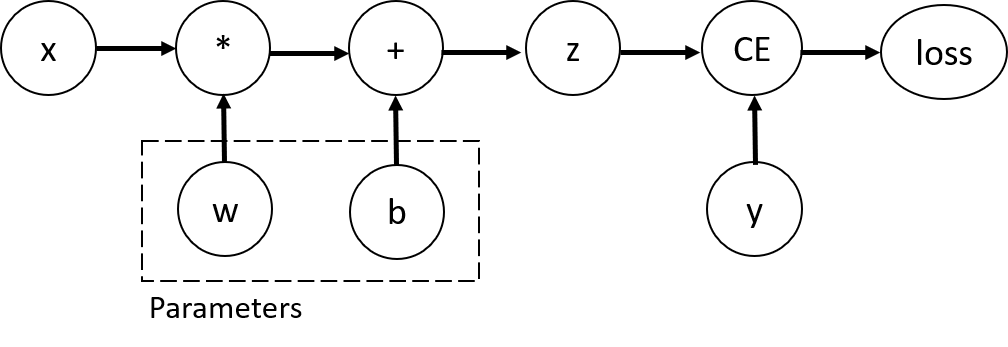

В этой сети `w` и `b` - параметры, которые нам нужно оптимизировать. Таким образом, нам нужно иметь возможность вычислять градиенты функции потерь по этим переменным. Для этого мы устанавливаем свойство `requires_grad` этих тензоров. 

ПРИМЕЧАНИЕ Вы можете установить значение `requires_grad` при создании тензора или позже, используя метод `x.requires_grad_(True)`. 

Функция, которую мы применяем к тензорам для построения вычислительного графа, на самом деле является объектом класса `Function`. Этот объект знает, как вычислить функцию в прямом направлении, а также как вычислить ее производную на этапе обратного распространения. Ссылка на функцию обратного распространения хранится в свойстве `grad_fn` тензора. Дополнительную информацию о функции можно найти в [документации](https://pytorch.org/docs/stable/autograd.html#function).

In [ ]:
print('Gradient function for z =',z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x7f00e5b75d50>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward object at 0x7f00e5b75f10>


### Вычисление градиентов 

Чтобы оптимизировать веса параметров в нейронной сети, нам нужно вычислить производные нашей функции потерь по параметрам, а именно, нам нужны частные производные `loss` как функции переменных `w` и `b` при некоторых фиксированных значениях `x` и `y`. Чтобы вычислить эти производные, мы вызываем `loss.backward()`, а затем получаем значения из `w.grad` и `b.grad`:

In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.2865, 0.3085, 0.3206],
        [0.2865, 0.3085, 0.3206],
        [0.2865, 0.3085, 0.3206],
        [0.2865, 0.3085, 0.3206],
        [0.2865, 0.3085, 0.3206]])
tensor([0.2865, 0.3085, 0.3206])


ПРИМЕЧАНИЕ 
* Мы можем получить свойства градиента только для конечных узлов вычислительного графа, у которых для свойства `requires_grad` установлено значение `True`. Для всех остальных узлов в нашем графике градиенты будут недоступны. 
* Мы можем выполнять вычисления градиента используя `backward` на заданном графе только 1 раз из соображений производительности. Если нам нужно выполнить несколько вызовов `backward` на одном и том же графе, нам нужно передать `keep_graph = True` вызову `backward`.

### Отключение отслеживания градиента 
По умолчанию все тензоры с `require_grad=True` отслеживают свою историю вычислений и поддерживают вычисление градиента. Однако есть некоторые случаи, когда это не нужно, например, когда мы обучили модель и просто хотим применить ее к некоторым входным данным, т.е. мы хотим выполнять только прямые вычисления через сеть. Мы можем остановить отслеживание вычислений, обернув наш вычислительный код блоком `torch.no_grad()`:

In [ ]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


Другой способ добиться того же результата - использовать метод `detach()` для тензора:

In [ ]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


Причины, по которым может понадобиться отключить отслеживание градиента: 
* Отметить некоторые параметры в нейронной сети как замороженные. Это очень распространенный случай для тонкой настройки предварительно обученной сети. 
* Для ускорения вычислений, когда выполняется только прямой проход, потому что вычисления на тензорах, которые не отслеживают градиенты, более эффективны.

### Подробнее о вычислительных графах 
Концептуально `autograd` хранит запись данных (тензоров) и всех выполненных операций (вместе с результирующими новыми тензорами) в ориентированном ациклическом графе (directed acyclic graph, DAG), состоящем из объектов `Function`. В этом DAG листья являются входными тензорами, корни - выходными тензорами. Прослеживая этот график от корней до листьев, вы можете автоматически вычислять градиенты, используя правило цепочки. 

При прямом проходе `autograd` одновременно выполняет две вещи: 
* запускает запрошенную операцию для вычисления результирующего тензора 
* поддерживает функцию градиента операции в DAG. 

Обратный проход начинается, когда `.backward()` вызывается в корне DAG. `autograd` тогда: 
* вычисляет градиенты из каждого `.grad_fn`, 
* накапливает их в атрибуте `.grad` соответствующего тензора 
* используя правило цепочки, распространяет их на все листовые тензоры.

ПРИМЕЧАНИЕ **DAG-файлы в PyTorch динамические**. 

Важно отметить, что после каждого вызова `.backward()` autograd начинает заполнять новый граф. Именно это свойство позволяет использовать операторы управления в модели; при необходимости можно изменять форму, размер и операции на каждой итерации.

Подробнее о [Autograd Mechanics](https://pytorch.org/docs/stable/notes/autograd.html)

## Оптимизация параметров модели
Обучение модели - это итеративный процесс; на каждой итерации (называемой *эпохой*, *epoch*) модель делает предикт, вычисляет ошибку в предикте (*потерю*, *loss*), собирает производные ошибки по параметрам  и оптимизирует эти параметры с использованием градиентного спуска. 

Повторим код из предыдущих разделов:

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

### Гиперпараметры 
Гиперпараметры - это настраиваемые параметры, которые позволяют управлять процессом оптимизации модели. Различные значения гиперпараметров могут повлиять на обучение модели и скорость сходимости Мы определяем следующие гиперпараметры для обучения: 
* **Number of Epochs** - количество повторений по набору данных, 
* **Batch size** - Размер пакета - количество образцов данных,
* **Learning rate** - Скорость обучения - сколько обновлять параметры модели в каждом пакете / эпохе. Меньшие значения снижают скорость обучения, а большие значения могут привести к непредсказуемому поведению во время обучения.

In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

### Цикл оптимизации
После того, как мы установили гиперпараметры, мы можем обучить и оптимизировать нашу модель с помощью цикла оптимизации. Каждая итерация цикла оптимизации называется эпохой. Каждая эпоха состоит из двух основных частей: 
* Цикл обучения - перебор обучающего набора данных и приближение к оптимальным параметрам. 
* Цикл проверки / тестирования - перебор набора тестовых данных, чтобы проверить, улучшается ли производительность модели. 

Давайте вкратце познакомимся с некоторыми концепциями, используемыми в цикле обучения.

**Loss function** (Функция потерь) 

При представлении некоторых обучающих данных наша неподготовленная сеть, скорее всего, не даст правильный ответ. **Функция потерь** измеряет степень несхожести полученного результата с целевым значением, и именно функцию потерь мы хотим минимизировать во время обучения. Чтобы рассчитать потери, мы делаем прогноз, используя входные данные нашей данной выборки данных, и сравниваем его с истинным значением метки данных. 

Встроенные функции потерь включают `nn.MSELoss` (среднеквадратическая ошибка) для задач регрессии и `nn.NLLLoss` (отрицательная логарифмическая вероятность) для классификации. `nn.CrossEntropyLoss` объединяет `nn.LogSoftmax` и `nn.NLLLoss`. 

В нашем случе мы передаем выходные логиты модели в `nn.CrossEntropyLoss`, который нормализует логиты и вычисляет ошибку предсказания.

In [ ]:
# Инициализируем функцию потерь
loss_fn = nn.CrossEntropyLoss()

**Optimizer** (Оптимизатор)

Оптимизация - это процесс настройки параметров модели для уменьшения ошибки модели на каждом этапе обучения. Алгоритмы оптимизации определяют, как этот процесс выполняется (в этом примере мы используем стохастический градиентный спуск). Вся логика оптимизации заключена в объект оптимизатора. Здесь мы используем оптимизатор `SGD`; Кроме того, в PyTorch доступно множество различных оптимизаторов, таких как `ADAM` и `RMSProp`, которые лучше работают с разными типами моделей и данных. 

Мы инициализируем оптимизатор, регистрируя параметры модели, которые необходимо обучить, и передавая гиперпараметр скорости обучения.

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Внутри цикла обучения оптимизация происходит в три этапа: 
* Вызовите `optimizer.zero_grad()`, чтобы сбросить градиенты параметров модели. Градиенты по умолчанию складываются; чтобы избежать двойного подсчета, мы явно обнуляем их на каждой итерации. 
* Запустите обратное распространение ошибки с помощью вызова `loss.backwards()`. PyTorch вычисляет градиенты потерь относительно каждого параметра. 
* Когда у нас есть градиенты, мы вызываем `optimizer.step()`, чтобы обновить параметры градиентами, собранными в обратном проходе.

**Полная реализация** 

Мы определяем `train_loop`, который перебирает наш код оптимизации, и `test_loop`, который оценивает производительность модели по нашим тестовым данным.

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Вычисляем прогноз и лосс
        pred = model(X)
        loss = loss_fn(pred, y)

        # Обратное распространение
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= size
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

Мы инициализируем функцию потерь и оптимизатор и передаем их в `train_loop` и `test_loop`. 

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.297573  [    0/60000]
loss: 2.293617  [ 6400/60000]
loss: 2.282916  [12800/60000]
loss: 2.294700  [19200/60000]
loss: 2.272167  [25600/60000]
loss: 2.253448  [32000/60000]
loss: 2.259889  [38400/60000]
loss: 2.237705  [44800/60000]
loss: 2.246063  [51200/60000]
loss: 2.255804  [57600/60000]
Test Error: 
 Accuracy: 34.9%, Avg loss: 0.035079 

Epoch 2
-------------------------------
loss: 2.212512  [    0/60000]
loss: 2.214924  [ 6400/60000]
loss: 2.189949  [12800/60000]
loss: 2.242221  [19200/60000]
loss: 2.176746  [25600/60000]
loss: 2.157673  [32000/60000]
loss: 2.180156  [38400/60000]
loss: 2.129171  [44800/60000]
loss: 2.163994  [51200/60000]
loss: 2.187657  [57600/60000]
Test Error: 
 Accuracy: 39.5%, Avg loss: 0.033520 

Epoch 3
-------------------------------
loss: 2.094434  [    0/60000]
loss: 2.089213  [ 6400/60000]
loss: 2.042597  [12800/60000]
loss: 2.157133  [19200/60000]
loss: 2.019265  [25600/60000]
loss: 2.011253  [32000/600

Подробнее см:
* [Loss Functions](https://pytorch.org/docs/stable/nn.html#loss-functions)
* [torch.optim](https://pytorch.org/docs/stable/optim.html)
* [Warmstart Training a Model](https://pytorch.org/tutorials/recipes/recipes/warmstarting_model_using_parameters_from_a_different_model.html)

## Сохранение и загрузка модели 


### Сохранение и загрузка весов моделей 
Модели PyTorch хранят выученные параметры во внутреннем словаре состояний, называемом `state_dict`. Их можно сохранить с помощью метода `torch.save`:

In [ ]:
model = models.vgg16(pretrained=True)
torch.save(model.state_dict(), 'model_weights.pth')

Чтобы загрузить веса модели, вам нужно сначала создать экземпляр той же модели, а затем загрузить параметры с помощью метода `load_state_dict()`.

In [ ]:
model = models.vgg16() # не указываем pretrained=True, т.е. не грузим дефолтные веса
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

**ПРИМЕЧАНИЕ** не забудьте вызвать метод `model.eval()` перед выводом, чтобы установить слои  `dropout` и `batch normalization` в режим оценки. Несоблюдение этого правила приведет к некорректным результатам вывода.

### Сохранение и загрузка моделей целиком
При загрузке весов модели нам нужно было сначала создать экземпляр класса модели, потому что класс определяет структуру сети. Можно сохранить структуру этого класса вместе с моделью, и в этом случае нужно передать модель (а не `model.state_dict()`) в функцию сохранения:

In [ ]:
torch.save(model, 'model.pth')

Мы сможем загрузить модель целиком так:

In [ ]:
model = torch.load('model.pth')

**ПРИМЕЧАНИЕ** Этот подход использует модуль `pickle` Python при сериализации модели, поэтому предполагается, что фактическое определение класса будет доступно при загрузке модели.

### Экспорт модели в ONNX
PyTorch также имеет встроенную поддержку экспорта ONNX. Однако, учитывая динамический характер графа выполнения PyTorch, процесс экспорта должен проходить через граф выполнения для создания корректной модели ONNX. По этой причине в процедуру экспорта следует передать тестовую переменную подходящего размера (в нашем случае мы создадим фиктивный нулевой тензор правильного размера):

In [ ]:
input_image = torch.zeros((1,3,224,224))
onnx.export(model, input_image, 'model.onnx')

С моделью ONNX можно делать множество вещей, включая выполнение логического вывода на разных платформах и на разных языках программирования. Для получения дополнительной информации мы рекомендуем [учебник ONNX](https://github.com/onnx/tutorials).

##Нейронная сеть для распознавания рукописных цифр на PyTorch

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [ ]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw

Processing...
Done!


In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


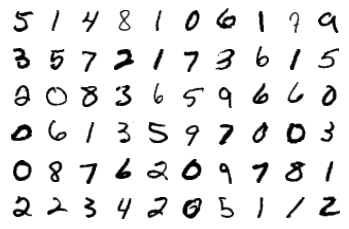

In [ ]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [ ]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

In [ ]:
print('Initial weights - ', model[0].weight)

Initial weights -  Parameter containing:
tensor([[-0.0176,  0.0275,  0.0160,  ..., -0.0053, -0.0272,  0.0083],
        [-0.0134,  0.0348, -0.0021,  ..., -0.0070,  0.0345, -0.0082],
        [-0.0001,  0.0223,  0.0216,  ...,  0.0119,  0.0232,  0.0269],
        ...,
        [ 0.0243,  0.0240, -0.0281,  ...,  0.0278,  0.0073,  0.0237],
        [ 0.0219, -0.0158, -0.0259,  ..., -0.0314, -0.0079,  0.0089],
        [-0.0133, -0.0071,  0.0155,  ...,  0.0048, -0.0031, -0.0297]],
       device='cuda:0', requires_grad=True)


In [ ]:
criterion = nn.NLLLoss() # Лосс для классификации
images, labels = next(iter(trainloader))
#images.resize_(64, 784)
images = images.view(images.shape[0], -1)

logps = model(images.cuda()) # Вероятности предсказаний
loss = criterion(logps, labels.cuda()) # рассчитываем NLL loss

In [ ]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014],
        ...,
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        [-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015],
        [ 0.0020,  0.0020,  0.0020,  ...,  0.0020,  0.0020,  0.0020]],
       device='cuda:0')


In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # переводим матрицы MNIST в вектора длиной 784
        images = images.view(images.shape[0], -1)
    
        # Тренировочный проход
        optimizer.zero_grad()
        
        output = model(images.cuda())
        loss = criterion(output, labels.cuda())
        
        # Здесь модель обучается засчёт обратного рассеяния
        loss.backward()
        
        # И здесь оптимизирует веса
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {:.4}, Training Time (in sec.) = {:.1f}".format(e, running_loss/len(trainloader), (time()-time0)))

Epoch 0 - Training loss: 0.6251, Training Time (in sec.) = 13.6
Epoch 1 - Training loss: 0.2812, Training Time (in sec.) = 27.1
Epoch 2 - Training loss: 0.2167, Training Time (in sec.) = 40.5
Epoch 3 - Training loss: 0.1768, Training Time (in sec.) = 53.9
Epoch 4 - Training loss: 0.1476, Training Time (in sec.) = 67.3
Epoch 5 - Training loss: 0.1282, Training Time (in sec.) = 80.9
Epoch 6 - Training loss: 0.1116, Training Time (in sec.) = 94.6
Epoch 7 - Training loss: 0.1004, Training Time (in sec.) = 108.3
Epoch 8 - Training loss: 0.08962, Training Time (in sec.) = 121.8
Epoch 9 - Training loss: 0.08, Training Time (in sec.) = 135.6
Epoch 10 - Training loss: 0.07346, Training Time (in sec.) = 149.4
Epoch 11 - Training loss: 0.06772, Training Time (in sec.) = 163.3
Epoch 12 - Training loss: 0.06218, Training Time (in sec.) = 177.0
Epoch 13 - Training loss: 0.05892, Training Time (in sec.) = 190.8
Epoch 14 - Training loss: 0.0537, Training Time (in sec.) = 204.6


In [ ]:
model.eval()

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

In [ ]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
        Функция для вывода изображений и соответствующих им классов
    '''
    ps = ps.cpu().data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 2


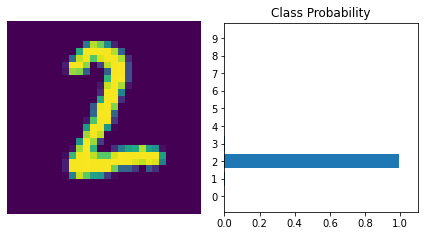

In [ ]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img.cuda())

ps = torch.exp(logps.cpu())
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [ ]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img.cuda())

    
    ps = torch.exp(logps.cpu())
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9752


In [ ]:
torch.save(model, './my_mnist_model.pt')

# Part 2 Предобученные модели

## Использование предобученной модели

In [ ]:
import torch 
import torchvision 
import torch.nn as nn 
import torch.utils.data as data 
import torchvision.transforms as transforms
import torchvision.datasets as dsets

import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 

In [ ]:
vgg16 = torchvision.models.vgg16(pretrained=True)
vgg16.eval() # переключаем в режим предсказания (выключаем Dropout)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Загружаем названия классов, на которых была обучена модель.

Формат файла:
```
{
  "0": [
    "n01440764",
    "tench"
  ],
  "1": [
    "n01443537",
    "goldfish"
  ],
  "2": [
    "n01484850",
    "great_white_shark"
  ],
  "3": [
    "n01491361",
    "tiger_shark"
  ],
  ...
```



In [ ]:
# подгружаем одной командой (из документации ImageNet)
!wget https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json 
class_idx = json.load(open("imagenet_class_index.json")) # подгружаем json файл
print (class_idx)
# по всей длине индексов классов вытаскиваем название
idx2label = np.array([class_idx[str(k)][1] for k in range(len(class_idx))]) 

--2021-06-17 04:35:49--  https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.250.70
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.250.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35363 (35K) [application/octet-stream]
Saving to: ‘imagenet_class_index.json’

imagenet_class_inde 100%[===================>]  34.53K  --.-KB/s    in 0.05s   

2021-06-17 04:35:49 (644 KB/s) - ‘imagenet_class_index.json’ saved [35363/35363]

{'0': ['n01440764', 'tench'], '1': ['n01443537', 'goldfish'], '2': ['n01484850', 'great_white_shark'], '3': ['n01491361', 'tiger_shark'], '4': ['n01494475', 'hammerhead'], '5': ['n01496331', 'electric_ray'], '6': ['n01498041', 'stingray'], '7': ['n01514668', 'cock'], '8': ['n01514859', 'hen'], '9': ['n01518878', 'ostrich'], '10': ['n01530575', 'brambling'], '11': ['n01531178', 'goldfinch'], '12': ['n01532829', 'house_finch'], '13': ['n01534433

In [ ]:
idx2label[:10]

array(['tench', 'goldfish', 'great_white_shark', 'tiger_shark',
       'hammerhead', 'electric_ray', 'stingray', 'cock', 'hen', 'ostrich'],
      dtype='<U30')

Изображения ImageNet имели такую нормализацию:

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.485, 0.456, 0.406), 
                                                                            std=(0.229, 0.224, 0.225))])

--2021-06-17 04:35:49--  http://dataudt.ru/datasets/Parakeet.jpg
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4764 (4.7K) [image/jpeg]
Saving to: ‘Parakeet.jpg’

Parakeet.jpg        100%[===================>]   4.65K  --.-KB/s    in 0s      

2021-06-17 04:35:50 (394 MB/s) - ‘Parakeet.jpg’ saved [4764/4764]



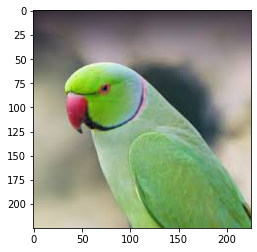

In [ ]:
!wget http://dataudt.ru/datasets/Parakeet.jpg
im_org = Image.open('Parakeet.jpg')
im_org = np.array(im_org)
plt.imshow(im_org)
plt.show()

In [ ]:
pk = Image.open('Parakeet.jpg')
pk = transform(pk) # Делаем порядок каналов как принято в PyTorch
pk.shape, im_org.shape

(torch.Size([3, 225, 225]), (225, 225, 3))

In [ ]:
k = vgg16.avgpool(pk.unsqueeze(0))
k.shape

torch.Size([1, 3, 7, 7])

In [ ]:
im_org = Image.open('Parakeet.jpg') 

# Применяем нормализацию
im = transform(im_org)
print(im.shape)

torch.Size([3, 225, 225])


In [ ]:
tns = np.random.random(size=(1,3,3,3))
tns_t = torch.from_numpy(tns)
k = vgg16.avgpool(tns_t)
k.shape

torch.Size([1, 3, 7, 7])

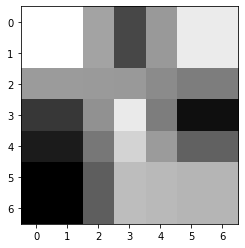

In [ ]:
plt.imshow(k.squeeze()[0].data.numpy(), cmap='gray')
plt.show()

Пропустим через софтмакс выход с последнего слоя предобученной сети, через которую мы прогнали наше изображение

Метка класса: lorikeet - Вероятность: 0.601859
Метка класса: bee_eater - Вероятность: 0.140810
Метка класса: fig - Вероятность: 0.062723
Метка класса: Granny_Smith - Вероятность: 0.038053
Метка класса: vine_snake - Вероятность: 0.030931


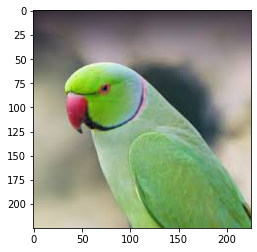

In [ ]:
probas = nn.Softmax(dim=1)(vgg16(im.unsqueeze(0))).view(-1) # добавляем дополнительное измерение,
                                                       # чтобы получить тензор формата [размер batch, ширина, высота, количество каналов]
                                                       # и вытягиваем в вектор                                           
sortedOuputs = torch.argsort(probas, descending=True) # в соответствие с каждой вероятностью подбираем класс

# Вывод 5 наиболее вероятных классов
for i in range(5):
    print("Метка класса: {:s} - Вероятность: {:4f}".format(
        idx2label[sortedOuputs[i]], probas[sortedOuputs[i]]))
    
plt.imshow(im_org)
plt.show()

In [ ]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

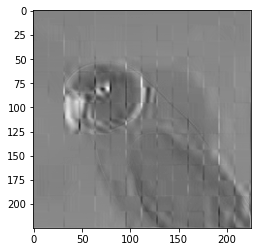

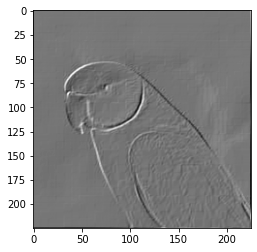

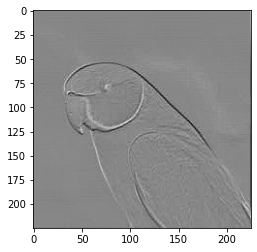

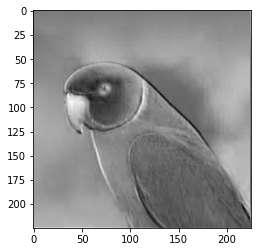

In [ ]:
for i in range(4):
    plt.imshow(vgg16.features[0](im.unsqueeze(0))[0][i].detach().numpy(), cmap='gray')
    plt.show()

## Настройка предобученной модели (fine-tuning)

In [ ]:
batchSize = 100 # Зададим размер батча
numClasses = 10 # Зададим количество классов
numEpochs = 10 # Зададим количество эпох для обучения
learningRate = 0.01 # Зададим параметр learningRate для оптимайзера

trainDataset = dsets.CIFAR10(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True) # Загружаем обучающую выборку CIFAR10

testDataset = dsets.CIFAR10(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor()) # Загружаем тестовую выборку CIFAR10

trainLoader = torch.utils.data.DataLoader(dataset=trainDataset, 
                                           batch_size=batchSize, 
                                           shuffle=True) # Создаем загрузчик для обучающей выборки

testLoader = torch.utils.data.DataLoader(dataset=testDataset, 
                                          batch_size=batchSize, 
                                          shuffle=False) # Создаем загрузчик для тестовой выборки


Extracting ./data/cifar-10-python.tar.gz to ./data


`trainLoader` является итерабельным (*Iterable*) объектом, т.е. может использоваться в цикле `for`
```
for item in trainLoader:
    ...
```

In [ ]:
iterator = iter(trainLoader)  # Создаем итератор для обучающей выборки
samples, labels = iterator.next()

In [ ]:
samples.shape, labels.shape

(torch.Size([100, 3, 32, 32]), torch.Size([100]))

In [ ]:
for samples, labels in trainLoader:
    print(samples.shape, labels.shape)
    break

torch.Size([100, 3, 32, 32]) torch.Size([100])


Посмотрим размерность данных на выходе слоя `avgpool` (перед подачей на классификатор):

In [ ]:
print(vgg16.avgpool(vgg16.features(samples)).shape)

torch.Size([100, 512, 7, 7])


Мы собираемся обучить классификатор распознаванию нашего датасета, поэтому нам надо заморозить веса слоев *до* классификатора.

Заменим последний слой для обучения под наш датасет

25088 = 7\*7\*512 - в качестве входных нейронов подаем результат вытягивания того, что на `AveragePooling2D(avgpool)`
                                        
На выходе 10 нейронов, т.к. 10 классов


In [ ]:
for param in vgg16.parameters(): 
    param.requires_grad = False 

vgg16.classifier = nn.Linear(25088, 10) 

In [ ]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

Если доступен GPU, будем использовать его. 

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

Копируем модель на устройство (GPU)

In [ ]:
vgg16.to(device);

Запустим цикл обучения нашего классификатора.
Поскольку тренируем только слой классификатор, то его параметры и подаем на вход оптимизатора.

In [ ]:
%%time
criterion = nn.CrossEntropyLoss() # Функция ошибки
optimizer = torch.optim.Adam(vgg16.classifier.parameters(), lr=learningRate)

for epoch in range(numEpochs):
    for i, (images, labels) in enumerate(trainLoader):          
        optimizer.zero_grad() # обнуляем градиенты
        outputs = vgg16(images.to(device)) # подаем наше изображение на вход
        loss = criterion(outputs, labels.to(device)) # считаем ошибку
        loss.backward() # берем производную
        optimizer.step() 
        
        if (i+1) % 100 == 0:
            print('Эпоха: [%d/%d], Шаг: [%d/%d], Потеря: %.4f' 
                  % (epoch+1, numEpochs, i+1, len(trainDataset)//batchSize, loss))

Эпоха: [1/10], Шаг: [100/500], Потеря: 17.6964
Эпоха: [1/10], Шаг: [200/500], Потеря: 15.5277
Эпоха: [1/10], Шаг: [300/500], Потеря: 19.1999
Эпоха: [1/10], Шаг: [400/500], Потеря: 17.5143
Эпоха: [1/10], Шаг: [500/500], Потеря: 13.1258
Эпоха: [2/10], Шаг: [100/500], Потеря: 20.4721
Эпоха: [2/10], Шаг: [200/500], Потеря: 14.7159
Эпоха: [2/10], Шаг: [300/500], Потеря: 19.0430
Эпоха: [2/10], Шаг: [400/500], Потеря: 13.1577
Эпоха: [2/10], Шаг: [500/500], Потеря: 17.8963
Эпоха: [3/10], Шаг: [100/500], Потеря: 19.2809
Эпоха: [3/10], Шаг: [200/500], Потеря: 17.5502
Эпоха: [3/10], Шаг: [300/500], Потеря: 15.3879
Эпоха: [3/10], Шаг: [400/500], Потеря: 16.5345
Эпоха: [3/10], Шаг: [500/500], Потеря: 18.5979
Эпоха: [4/10], Шаг: [100/500], Потеря: 15.3306
Эпоха: [4/10], Шаг: [200/500], Потеря: 16.2828
Эпоха: [4/10], Шаг: [300/500], Потеря: 20.3837
Эпоха: [4/10], Шаг: [400/500], Потеря: 16.1698
Эпоха: [4/10], Шаг: [500/500], Потеря: 20.5726
Эпоха: [5/10], Шаг: [100/500], Потеря: 19.2193
Эпоха: [5/10]

Так можно сохранить и восстановить модель:

In [ ]:
torch.save(vgg16, 'vgg16_pytorch.pkl')
vgg16 = torch.load('vgg16_pytorch.pkl')

In [ ]:
from time import time
curTime = time()
vgg16.to(device).eval()  # включаем режим предикта
correct = 0
total = 0

for images, labels in testLoader: 
    outputs = vgg16(images.to(device)) 
    _, predicted = torch.max(outputs.data, dim=1) # вытаскиваем индексы лейблов
    total += labels.size(0) # здесь лежит количество всего
    correct += (predicted == labels.to(device)).sum() # считаем количество совпадений
    
print('Точность для 10000 картинок: %d %%' % (100 * correct // total))
print('time: %.2f сек.' % (time() - curTime))

Точность для 10000 картинок: 47 %
time: 2.40 сек.


In [ ]:
predicted.shape

torch.Size([100])

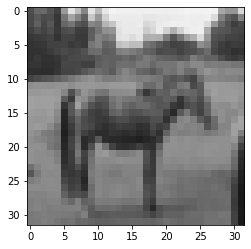

Предсказание: лошадь


In [ ]:
n = 99
im = images[n, 1].numpy() 
im = 255 * np.reshape(im, (32, 32)) 
x = Image.fromarray(im.astype(np.uint8)).convert('RGBA') #Данные массива должны быть универсальной кодировки и приводим к формату изображения

plt.imshow(x)
plt.show()

# Предсказание
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']
print("Предсказание:", classes[predicted[n].item()])


# Перенос стиля

Мы реализуем алгоритм [Neural-Style](https://arxiv.org/abs/1508.06576),  разработанный Леоном А. Гэтисом, Александром С. Эккером и Матиасом Бетге. 

Алгоритм Neural-Style, или Neural-Transfer воспроизводить картины в новом художественном стиле. 

Алгоритм берет исходное изображение и изображение-стиль, и изменяет исходное изображение таким образом, что сохраняется его контент, а художественный стиль переносится из изображения-стиля.

### Основной принцип 

Мы определяем два расстояния, одно для контента. ($ D_C $) и одно для стиля ($ D_S $). $ D_C $ измеряет, насколько различается контент между двумя изображениями, а $ D_S $ измеряет, насколько отличается стиль между двумя изображениями. 

Затем мы берем третье изображение и преобразовываем его так, чтобы минимизировать его content-расстояние от content-изображения и его style-расстояние от style-изображения. 

Импорт пакетов и выбор устройства
---------------------------------

-  ``torch``, ``torch.nn``, ``numpy`` (indispensables packages for
   neural networks with PyTorch)
-  ``torch.optim`` (efficient gradient descents)
-  ``PIL``, ``PIL.Image``, ``matplotlib.pyplot`` (load and display
   images)
-  ``torchvision.transforms`` (transform PIL images into tensors)
-  ``torchvision.models`` (train or load pre-trained models)
-  ``copy`` (to deep copy the models; system package)


In [ ]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models

import copy

Нужно выбрать, на каком устройстве будет работать сеть, и импортировать контент и стиль изображения. Запуск алгоритма нейронной передачи на больших изображениях занимает много времени и будет выполняться намного быстрее при работе на графическом процессоре. Мы можем использовать `torch.cuda.is_available()`, чтобы определить, доступен ли графический процессор. Затем мы настраиваем `torch.device` для использования. Метод `.to(device)` используется для перемещения тензоров или модулей на желаемое устройство.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

### Загрузка изображений 
Импортируем изображения стиля и содержимого. Исходные изображения PIL имеют значения от 0 до 255, но при преобразовании в pytorch-тензоры их значения преобразуются в значения от 0 до 1. Размер изображений также необходимо изменить, чтобы они имели одинаковые размеры. 

Следует отметить важную деталь: нейронные сети из библиотеки torch обучаются с использованием значений тензора от 0 до 1. В нормировке 0..255 сеть не будет работать.


In [ ]:
!wget http://dataudt.ru/datasets/picasso.jpg http://dataudt.ru/datasets/dancing.jpg

--2021-06-17 04:42:14--  http://dataudt.ru/datasets/picasso.jpg
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114573 (112K) [image/jpeg]
Saving to: ‘picasso.jpg’

picasso.jpg         100%[===================>] 111.89K   216KB/s    in 0.5s    

2021-06-17 04:42:15 (216 KB/s) - ‘picasso.jpg’ saved [114573/114573]

--2021-06-17 04:42:15--  http://dataudt.ru/datasets/dancing.jpg
Reusing existing connection to dataudt.ru:80.
HTTP request sent, awaiting response... 200 OK
Length: 40484 (40K) [image/jpeg]
Saving to: ‘dancing.jpg’

dancing.jpg         100%[===================>]  39.54K  --.-KB/s    in 0s      

2021-06-17 04:42:15 (339 MB/s) - ‘dancing.jpg’ saved [40484/40484]

FINISHED --2021-06-17 04:42:15--
Total wall clock time: 1.5s
Downloaded: 2 files, 151K in 0.5s (293 KB/s)


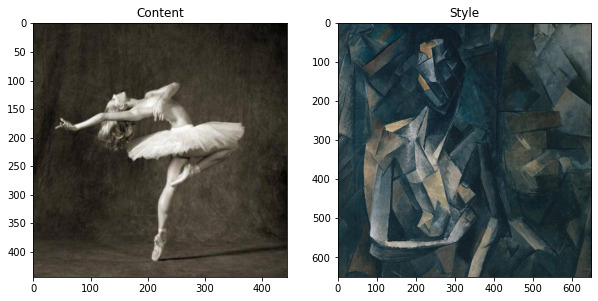

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
img = Image.open("dancing.jpg")
plt.imshow(img)
plt.title('Content')
plt.subplot(1,2,2)
img = Image.open("picasso.jpg")
plt.imshow(img)
plt.title('Style');

Загрузим эти изображения в виде тензоров и поместим их на GPU

In [ ]:
# Желаемый размер изображений
imsize = 512 if torch.cuda.is_available() else 128  # изображение берём меньше, если обучаем не на CPU

loader = transforms.Compose([
    transforms.Resize(imsize),  # изменили размер импортируемого изображения
    transforms.ToTensor()])  # преобразовали его в torch tensor


def image_loader(image_name):
    image = Image.open(image_name)
    # добавляем дополнительную размерность, для ввода в сеть
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)

style_img = image_loader("picasso.jpg")
content_img = image_loader("dancing.jpg")

assert style_img.size() == content_img.size(), "изображения контента и стиля должны иметь одинаковые размеры"

Теперь давайте создадим функцию, которая отображает изображение, повторно конвертируя его копию в формат PIL и отображая копию с помощью plt.imshow. Мы попытаемся отобразить содержимое и стили изображения, чтобы убедиться, что они были импортированы правильно.

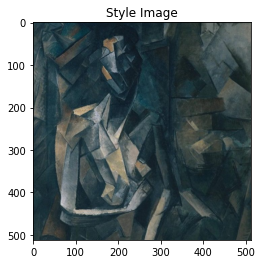

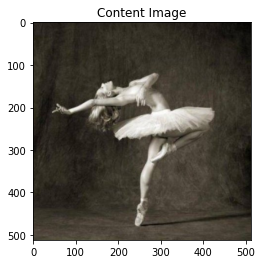

In [ ]:
unloader = transforms.ToPILImage()  # конвертируем в массив PIL image

plt.ion()

def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # клонируем тензор, чтобы оставить его неизменным
    image = image.squeeze(0)      # удаляем лишнюю размерность
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # вводим паузу, чтобы картинки успевали отрисовываться


plt.figure()
imshow(style_img, title='Style Image')

plt.figure()
imshow(content_img, title='Content Image')

### Функции потерь

**Потеря контента**

Потеря контента - это функция, которая представляет собой взвешенное расстояние между контентом и содержимым для отдельного слоя. 

Мы реализуем вычисление потери контента как слой сети, пропускающий без изменения свой вход на выход. Поместим этот слой (модуль) потери контента сразу после сверточных слоев, которые используются для вычисления расстояния между содержимым. Таким образом, каждый раз, когда в сеть подается входное изображение, потери контента будут вычисляется на желаемых слоях. Чтобы сделать слой потери контента "прозрачным", мы должны определить метод `forward`, который вычисляет content loss, а затем возвращает входные данные слоя. Вычисленная потеря сохраняется как свойство модуля `self.loss`.



In [ ]:
class ContentLoss(nn.Module):

    def __init__(self, target,):
        super().__init__()
        # отделяем целевой контент от используемого дерева
        # для динамического вычисления градиента: это неизменное значение,
        # не переменная. В противном случае forward метод в criterion
        # выдаст ошибку.

        self.target = target.detach()

    def forward(self, input):
        self.loss = F.mse_loss(input, self.target)
        return input

**Потеря стиля**
Модуль реализован аналогично модулю потери контента. Он будет действовать как прозрачный слой в сети, которая вычисляет потерю стиля этого слоя. Чтобы вычислить потерю стиля, нам нужно вычислить матрицу грамма $ G_ {XL} $. Матрица Грамма- это результат умножения заданной матрицы на ее транспонированную матрицу. 

Матрица Грамма должна быть нормализована путем деления каждого элемента на общее количество элементов в матрице. Особенности стиля, как правило, находятся в более глубоких слоях сети, поэтому эта нормализация имеет большое значение.


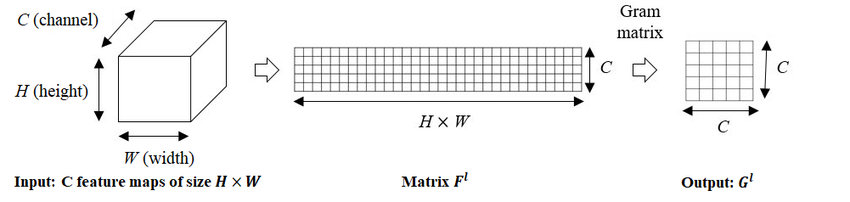

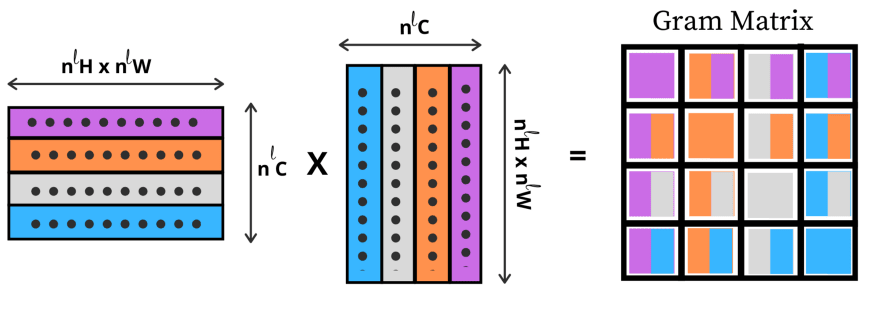

In [ ]:
def gram_matrix(input):
    a, b, c, d = input.size()  # a=batch size(=1)
    # b = количество карт признаков
    # (c,d) = размерности карт признаков f. map (N=c*d)

    features = input.view(a * b, c * d)  # изменяем размерность F_XL 

    G = torch.mm(features, features.t())  # вычисляем матрицу Грама

    # "нормализуем" значения в матрице Грама
    # путём деления на число элементов в каждой карте признаков.
    return G.div(a * b * c * d)

Теперь модуль потери стиля выглядит почти так же, как модуль потери контента. Расстояние стиля также вычисляется с использованием среднеквадратичной ошибки между $G_{XL}$ и $G_{SL}$.

In [ ]:
class StyleLoss(nn.Module):

    def __init__(self, target_feature):
        super().__init__()
        self.target = gram_matrix(target_feature).detach()

    def forward(self, input):
        G = gram_matrix(input)
        self.loss = F.mse_loss(G, self.target)
        return input

### Импорт модели 
Теперь нам нужно импортировать предварительно обученную нейронную сеть. Мы будем использовать 19-слойную сеть VGG19. Реализация VGG19 в PyTorch представляет собой модуль, разделенный на два дочерних последовательных модуля: фичи (features) (содержащие слои свертки и объединения) и классификатор (содержащий полносвязные слои). Мы будем использовать модуль фич, потому что нам нужны выходные данные отдельных слоев свертки для измерения потерь контента и стиля. 

Некоторые слои (например Dropout) во время обучения ведут себя иначе, чем при оценке, поэтому мы должны установить сеть в режим оценки с помощью `.eval()`.

In [ ]:
cnn = models.vgg19(pretrained=True).features.to(device).eval()

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


Кроме того, сети VGG обучаются на изображениях с каждым каналом, нормализованным по среднему значению = [0,485, 0,456, 0,406] и std = [0,229, 0,224, 0,225]. Мы будем использовать их для нормализации изображения перед отправкой в ​​сеть.

In [ ]:
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

# создаём модуль нормализации входных массивов изображений, чтобы подать их в
# nn.Sequential
class Normalization(nn.Module):
    def __init__(self, mean, std):
        super(Normalization, self).__init__()
        # с помощью .view преобразуем mean и std к размерам [C x 1 x 1] чтобы можно было
        # работать напрямую с тензором изображения размерами [B x C x H x W], где
        # B - batch size. C - число каналов. H - высота, W - ширина.
        self.mean = torch.tensor(mean).view(-1, 1, 1)
        self.std = torch.tensor(std).view(-1, 1, 1)

    def forward(self, img):
        # нормализуем картинку
        return (img - self.mean) / self.std

Модуль `Sequential` содержит упорядоченный список дочерних модулей. Например, `vgg19.features` содержит последовательность (Conv2d, ReLU, MaxPool2d, Conv2d, ReLU…), вызываемых в правильном порядке. Нам нужно добавить наши слои потери контента и потери стиля сразу после слоя свертки, который они обслуживают. Для этого мы должны создать новый модуль Sequential, в который правильно вставлены модули потери содержимого и потери стиля. 

In [ ]:
# определяем слои для расчёта потерь стиля/контента(содержания) :
content_layers_default = ['conv_4']
style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

# Пересобираем модель, добавляя свои слои и отбрасывая последние, не нужные слои исходной модели.
# На выходе - пересобранная модель и 2 списка потерь.
def get_style_model_and_losses(cnn, normalization_mean, normalization_std,
                               style_img, content_img,
                               content_layers=content_layers_default,
                               style_layers=style_layers_default):
    cnn = copy.deepcopy(cnn)

    # модуль нормализации
    normalization = Normalization(normalization_mean, normalization_std).to(device)

    # это чтобы иметь итерабельный доступ к списку потерь стиля/контента(содержания)
    style_losses = []
    content_losses = []

    # зная что свёрточная сеть nn.Sequential, создаём новую nn.Sequential
    # чтобы вложить в неё модули, активируемые последовательно
    model = nn.Sequential(normalization)

    i = 0  # увеличиваем каждый раз, как встречаем свёрточный слой conv
    for layer in cnn.children():
        if isinstance(layer, nn.Conv2d):
            i += 1
            name = 'conv_{}'.format(i)
        elif isinstance(layer, nn.ReLU):
            name = 'relu_{}'.format(i)
            # Версия in-place не очень хорошо взаимодействует с ContentLoss
            # и StyleLoss, которые мы вводим ниже. Заменяем на out-of-place
            layer = nn.ReLU(inplace=False) # inplace=True модифицирует сам вход
        elif isinstance(layer, nn.MaxPool2d):
            name = 'pool_{}'.format(i)
        elif isinstance(layer, nn.BatchNorm2d):
            name = 'bn_{}'.format(i)
        else:
            raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))

        model.add_module(name, layer)

        # Добавляем наши слои потерь после выбранных слоев
        if name in content_layers:
            # добавляем loss контента:
            target = model(content_img).detach()
            content_loss = ContentLoss(target)
            model.add_module("content_loss_{}".format(i), content_loss)
            content_losses.append(content_loss)

        if name in style_layers:
            # добавляем loss стиля:
            target_feature = model(style_img).detach()
            style_loss = StyleLoss(target_feature)
            model.add_module("style_loss_{}".format(i), style_loss)
            style_losses.append(style_loss)

    # отбрасываем все слои после последнего слоя content loss или style loss - они нам не нужны.
    for i in range(len(model) - 1, -1, -1):
        if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss):
            break

    model = model[:(i + 1)]

    return model, style_losses, content_losses

Посмотрим, какая получилась модель:

In [ ]:
model, style_losses, content_losses = get_style_model_and_losses(cnn,
        cnn_normalization_mean, cnn_normalization_std, style_img, content_img)
model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]


Sequential(
  (0): Normalization()
  (conv_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (style_loss_1): StyleLoss()
  (relu_1): ReLU()
  (conv_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (style_loss_2): StyleLoss()
  (relu_2): ReLU()
  (pool_2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (style_loss_3): StyleLoss()
  (relu_3): ReLU()
  (conv_4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (content_loss_4): ContentLoss()
  (style_loss_4): StyleLoss()
  (relu_4): ReLU()
  (pool_4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (style_loss_5): StyleLoss()
)

Далее выбираем входное изображение. Можно использовать копию изображения содержимого или белый шум.

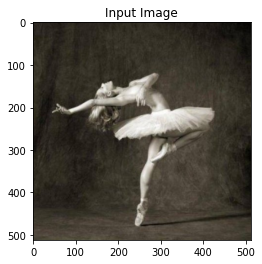

In [ ]:
input_img = content_img.clone()
# для использования белого шума в качестве начального изображения раскоментируйте строку ниже:
# input_img = torch.randn(content_img.data.size(), device=device)

plt.figure()
imshow(input_img, title='Input Image')

###Градиентный спуск 
Как предложил Леон Гэтис, автор алгоритма, [здесь](https://discuss.pytorch.org/t/pytorch-tutorial-for-neural-transfert-of-artistic-style/336/20?u=alexis-jacq), мы будем использовать алгоритм L-BFGS для запуска нашего градиентного спуска. 

В отличие от обучения сети, мы хотим обучить входное изображение, чтобы минимизировать потери контента / стиля. Мы создадим оптимизатор PyTorch L-BFGS optim.LBFGS и передадим ему наше изображение в качестве тензора для оптимизации.

In [ ]:
def get_input_optimizer(input_img):
    # this line to show that input is a parameter that requires a gradient
    optimizer = optim.LBFGS([input_img.requires_grad_()])
    return optimizer

Наконец, мы должны определить функцию, которая выполнит перенос стиля. Для каждой итерации она получает обновленные входные данные и вычисляет новые потери. Мы запустим методы `backward` каждого модуля потерь, чтобы динамически вычислить градиенты. Оптимизатор использует функцию-замыкание, которая вычисляет и возвращает потерю. 

Есть еще одна проблема, которую необходимо решить. В результате применения градиентов данные изображения могут выйти за допустимые границы от 0 до 1. Мы решим эту проблему, исправляя входные значения от 0 до 1 при каждом запуске сети.

In [ ]:
def run_style_transfer(cnn, normalization_mean, normalization_std,
                       content_img, style_img, input_img, num_steps=300,
                       style_weight=1000000, content_weight=1):
    """Run the style transfer."""
    print('Building the style transfer model..')
    model, style_losses, content_losses = get_style_model_and_losses(cnn,
        normalization_mean, normalization_std, style_img, content_img)
    optimizer = get_input_optimizer(input_img)

    print('Optimizing..')
    run = [0]
    while run[0] <= num_steps:

        def closure():
            # обрезаем данные, вышедшие за пределы от 0 до 1
            input_img.data.clamp_(0, 1)

            optimizer.zero_grad()
            model(input_img)
            style_score = 0
            content_score = 0

            for sl in style_losses:
                style_score += sl.loss
            for cl in content_losses:
                content_score += cl.loss

            style_score *= style_weight
            content_score *= content_weight

            loss = style_score + content_score
            loss.backward()

            run[0] += 1
            if run[0] % 50 == 0:
                print("run {}:".format(run))
                print('Style Loss : {:4f} Content Loss: {:4f}'.format(
                    style_score.item(), content_score.item()))
                print()

            return style_score + content_score

        optimizer.step(closure)

    # финальная корректировка...
    input_img.data.clamp_(0, 1)

    return input_img

Наконец, запускаем алгоритм:

Building the style transfer model..
Optimizing..


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]


run [50]:
Style Loss : 3.956969 Content Loss: 4.169160

run [100]:
Style Loss : 1.128456 Content Loss: 3.025765

run [150]:
Style Loss : 0.715290 Content Loss: 2.663057

run [200]:
Style Loss : 0.480228 Content Loss: 2.498985

run [250]:
Style Loss : 0.347473 Content Loss: 2.412225

run [300]:
Style Loss : 0.266786 Content Loss: 2.361137



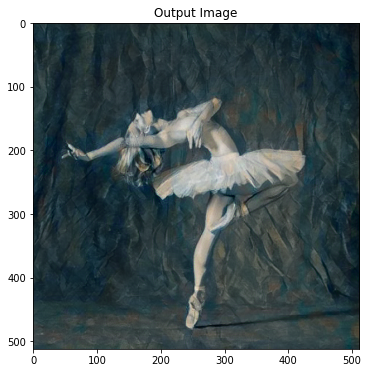

In [ ]:
output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img)

plt.figure(figsize=(6, 6))
imshow(output, title='Output Image')
plt.ioff()
plt.show()

#Литература

1. https://pytorch.org/docs/stable/notes/autograd.html

2. https://habr.com/ru/post/334380/

3. https://www.machinelearningmastery.ru/handwritten-digit-mnist-pytorch-977b5338e627/

4. https://overcoder.net/q/369666/%D0%BA%D0%B0%D0%BA-%D1%81%D0%B4%D0%B5%D0%BB%D0%B0%D1%82%D1%8C-%D0%BF%D1%80%D0%BE%D0%B8%D0%B7%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5-%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86-%D0%B2-pytorch

5. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ion.html

6. https://discuss.pytorch.org/t/whats-the-difference-between-nn-relu-and-nn-relu-inplace-true/948

7. https://pytorch.org/docs/stable/generated/torch.unsqueeze.html

8. https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%91%D1%80%D0%BE%D0%B9%D0%B4%D0%B5%D0%BD%D0%B0_%E2%80%94_%D0%A4%D0%BB%D0%B5%D1%82%D1%87%D0%B5%D1%80%D0%B0_%E2%80%94_%D0%93%D0%BE%D0%BB%D1%8C%D0%B4%D1%84%D0%B0%D1%80%D0%B1%D0%B0_%E2%80%94_%D0%A8%D0%B0%D0%BD%D0%BD%D0%BE

9. https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html

10. https://qna.habr.com/q/701967

11. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.isinteractive.html#matplotlib.pyplot.isinteractive

12. https://habr.com/ru/company/intel/blog/170729/


#End